In [1]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', 600)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 600)
plt.rcParams["figure.figsize"] = (14,5)

In [3]:
engine = create_engine('postgresql://mlanciau@localhost:5432/mlanciau')
conn = engine.connect();

# Last 20 tweets about PostgreSQL

In [4]:
pd.read_sql('''
SELECT *
FROM mlanciau_gold.t_twitter_postgresql
ORDER BY c_id DESC
LIMIT 20
''', conn)

,c_id,c_text,c_lang,c_retweet,c_created_at,c_loaded_at,c_author_id
0,1528566140133249024,"Render's free plan looks perfectly reasonable. Suspend after 15 minutes of inactivity, 750 hrs/month, suspend until you actively convert to a paid plan. Free postgres db, suspends after 90 days then a 14 day grace period before deletion.",en,False,2022-05-23 02:39:01+00:00,2022-05-23 02:40:02.175455+00:00,507619188
1,1528560827011411975,RT @JavaScriptFeed: A tagged template literals utility for ease of composing parameterized SQL queries via @itnext_io\n\n#javascript #paramet…,en,True,2022-05-23 02:17:55+00:00,2022-05-23 02:20:01.505503+00:00,1398866593237508100
2,1528560020555649024,RT @JavaScriptFeed: A tagged template literals utility for ease of composing parameterized SQL queries via @itnext_io\n\n#javascript #paramet…,en,True,2022-05-23 02:14:42+00:00,2022-05-23 02:15:02.558760+00:00,1204128767251230720
3,1528560020400513028,RT @JavaScriptFeed: A tagged template literals utility for ease of composing parameterized SQL queries via @itnext_io\n\n#javascript #paramet…,en,True,2022-05-23 02:14:42+00:00,2022-05-23 02:15:02.558760+00:00,1204128767251230720
4,1528560020375347201,RT @JavaScriptFeed: A tagged template literals utility for ease of composing parameterized SQL queries via @itnext_io\n\n#javascript #paramet…,en,True,2022-05-23 02:14:42+00:00,2022-05-23 02:15:02.558760+00:00,1204128767251230720
5,1528559765923991552,RT @JavaScriptFeed: A tagged template literals utility for ease of composing parameterized SQL queries via @itnext_io\n\n#javascript #paramet…,en,True,2022-05-23 02:13:42+00:00,2022-05-23 02:15:02.558760+00:00,1437728609909706753
6,1528559761716813824,RT @JavaScriptFeed: A tagged template literals utility for ease of composing parameterized SQL queries via @itnext_io\n\n#javascript #paramet…,en,True,2022-05-23 02:13:41+00:00,2022-05-23 02:15:02.558760+00:00,1127829883013361665
7,1528559738207748098,A tagged template literals utility for ease of composing parameterized SQL queries via @itnext_io\n\n#javascript #parameterizedquery #postgres #templateliterals #nodejs #sql #100daysofcode #webdev #webdevelopment\nhttps://t.co/U2vvyHZg2r,en,False,2022-05-23 02:13:35+00:00,2022-05-23 02:15:02.558760+00:00,945366261000822789
8,1528551732829110272,"RT @ongresinc: If Caleb says so, wouldn't you want to try https://t.co/AyARLFAgfT? It's easy, it's fully Open Source.\n\n#Postgres on #Kubern…",en,True,2022-05-23 01:41:46+00:00,2022-05-23 01:45:01.929450+00:00,1425764869106585600
9,1528549379254239232,RT @coloradotravis: @agraham999 @karaswisher @profgalloway @RobinhoodApp I’m with you.\n\nNot to mention the ‘tech’ here is absurd — Postgres…,en,True,2022-05-23 01:32:25+00:00,2022-05-23 01:35:02.506212+00:00,3109543847


## What are the main language ?

<AxesSubplot:ylabel='c_nbr'>

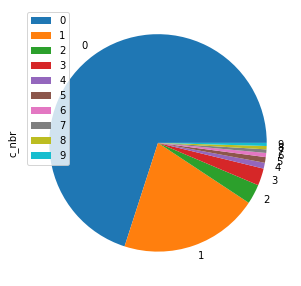

In [5]:
data = pd.read_sql('''
SELECT c_lang, COUNT(*) AS c_nbr
FROM mlanciau_gold.t_twitter_postgresql
GROUP BY c_lang
ORDER BY c_nbr DESC
LIMIT 10
''', conn)
data.plot(x='c_lang', y='c_nbr', kind='pie')

# Last most ReTweet from past 7 days

In [6]:
pd.read_sql('''
SELECT c_text, COUNT(*) AS c_nbr
FROM mlanciau_gold.t_twitter_postgresql
WHERE c_created_at > CURRENT_TIMESTAMP - 7 * Interval '1 day' AND c_retweet
GROUP BY c_text
ORDER BY c_nbr DESC
LIMIT 20
''', conn)

,c_text,c_nbr
0,RT @phil_eaton: New blog post is up :) Let's build a distributed postgres proof of concept.\n\nhttps://t.co/Z8BDzF1bUw https://t.co/aSkOjr9Yrh,48
1,RT @gipinheiral: 🚀 Vagas Tech passando no seu feed 🚀\n\n⚠️ Sr. Frontend (React e Ruby on Rails)\n💵 $7k a $7.5k US\n\n🛑 Jr./Pleno/Sr. Backend (G…,35
2,RT @craigkerstiens: Unfinished Business with Postgres: https://t.co/bPPvV7j1gu,26
3,RT @PythonWeekly: django-pgpubsub - A distributed task processing framework for Django built on top of the Postgres NOTIFY/LISTEN protocol.…,20
4,RT @AzureDBPostgres: Hot off the press 📣 new blog post by engineer @halilozanakgul all about new @AzDataFactory features for moving data t…,20
5,RT @mihaiiuga3: 15/ - Working on postgres outport driver: fixes on logging and genesis data indexing; system testing and import-db setup\n-…,16
6,"RT @_GBartolini_: My talk about Running #Postgres the #Kubernetes way with #CloudNativePG is about to start, with this quote from @Melissa_…",13
7,RT @CloudNativePg: We're in #KubeCon and now we have 139 stars in Github. Can you help us reach 200 stars? Before though try our #Postgres…,13
8,RT @DoKcommunity: .@EDBPostgres introducing and demoing @CloudNativePg: their new open-source Kubernetes Operator for Postgres. https://t.c…,12
9,RT @PerconaBytes: Follow this tutorial from Percona Community regular live stream with Chino &amp; the Hoss to learn how to perform a manual ba…,11


In [7]:
pd.read_sql('''
SELECT c_text, COUNT(*) AS c_nbr
FROM mlanciau_gold.t_twitter_postgresql
WHERE c_lang = 'fr' AND c_created_at > CURRENT_TIMESTAMP - 7 * Interval '1 day' AND c_retweet
GROUP BY c_text
ORDER BY c_nbr DESC
LIMIT 20
''', conn)

,c_text,c_nbr


# Histogram on last month

<AxesSubplot:title={'center':'c_date'}, xlabel='c_date'>

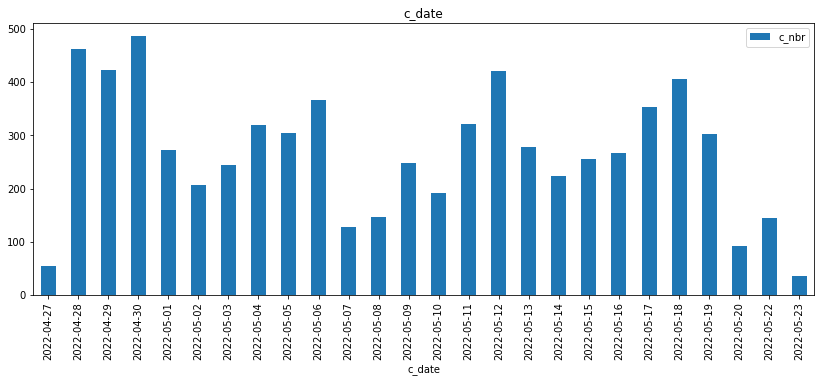

In [8]:
data = pd.read_sql('''
SELECT *
FROM mlanciau_gold.t_twitter_postgresql_nbr_per_day
WHERE c_date > CURRENT_TIMESTAMP - 30 * Interval '1 day'
ORDER BY c_date
''', conn)
data
data.plot(x='c_date', kind='bar', title='c_date')

<AxesSubplot:xlabel='c_author_id'>

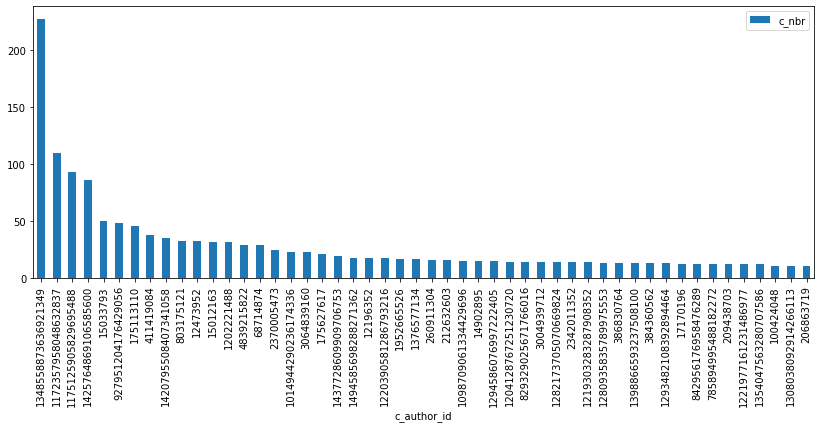

In [9]:
data = pd.read_sql('''
SELECT c_nbr, c_author_id
FROM mlanciau_gold.t_twitter_postgresql_nbr_tweet_per_author
WHERE c_author_id IS NOT NULL
ORDER BY c_nbr DESC
LIMIT 50
''', conn)
data.plot(x='c_author_id', kind='bar')

In [10]:
conn.close()